In [50]:
# Paste output from benchmark binary. This notebook parses and plots the benchmark results.
benchmark_output = '''
-------------------------------------------------------------------------------------------------------------------------
Benchmark                                                               Time             CPU   Iterations UserCounters...
-------------------------------------------------------------------------------------------------------------------------
ScanSpeed                                                        16551123 ns     16522225 ns           40 bytes_per_second=2.9553G/s
SplitLines/strchr                                                45564383 ns     45513200 ns           15 bytes_per_second=1098.58M/s
SplitLines/find_first_of(char)                                   35459296 ns     35420100 ns           20 bytes_per_second=1.37854G/s
SplitLines/find_first_of(str)                                    39686146 ns     39188056 ns           18 bytes_per_second=1.246G/s
SplitLines/getline                                              221169222 ns    220320333 ns            3 bytes_per_second=226.942M/s
LineTokenize/strpbrk/space_only                                      52.4 ns         52.2 ns     13390210 bytes_per_second=767.162M/s lines_tokenized_per_second=57.4591M/s
LineTokenize/strpbrk/space_tab                                       88.9 ns         88.6 ns      7864108 bytes_per_second=451.962M/s lines_tokenized_per_second=33.8512M/s
LineTokenize/strtok/space_only                                       71.8 ns         71.5 ns      9803235 bytes_per_second=559.864M/s lines_tokenized_per_second=41.9329M/s
LineTokenize/strtok/space_tab                                         107 ns          106 ns      6547992 bytes_per_second=376.341M/s lines_tokenized_per_second=28.1873M/s
IntFieldParse/from_chars                                             10.5 ns         10.5 ns     66851304 bytes_per_second=638.058M/s fields_converted_per_second=191.158M/s
IntFieldParse/atol                                                   17.5 ns         17.5 ns     39978297 bytes_per_second=381.244M/s fields_converted_per_second=114.218M/s
IntFieldParse/stoll                                                  39.4 ns         39.3 ns     17990558 bytes_per_second=169.956M/s fields_converted_per_second=50.9176M/s
IntFieldParse/strtoll                                                19.4 ns         19.4 ns     35765927 bytes_per_second=344.005M/s fields_converted_per_second=103.062M/s
IntFieldParse/sscanf                                                 68.8 ns         68.7 ns     10194422 bytes_per_second=97.1816M/s fields_converted_per_second=29.1149M/s
IntFieldParse/istringstream                                           222 ns          222 ns      3139478 bytes_per_second=30.0295M/s fields_converted_per_second=8.99664M/s
DoubleFieldParse/from_chars(fast_float)                              19.4 ns         19.4 ns     36004897 bytes_per_second=687.779M/s fields_converted_per_second=154.54M/s
DoubleFieldParse/strtod                                              51.1 ns         50.9 ns     14126061 bytes_per_second=262.251M/s fields_converted_per_second=58.9265M/s
DoubleFieldParse/sscanf                                               184 ns          183 ns      3825095 bytes_per_second=72.8437M/s fields_converted_per_second=16.3676M/s
DoubleFieldParse/istringstream                                        392 ns          391 ns      1784940 bytes_per_second=34.1406M/s fields_converted_per_second=7.67121M/s
LineParse/istringstream                                               953 ns          952 ns       735742 bytes_per_second=42.0691M/s lines_parsed_per_second=3.15091M/s
LineParse/sscanf                                                      351 ns          350 ns      1999212 bytes_per_second=114.33M/s lines_parsed_per_second=8.56313M/s
LineParse/strtoll+strtod                                              109 ns          109 ns      6421842 bytes_per_second=367.209M/s lines_parsed_per_second=27.5033M/s
LineParse/from_chars+strtod/space_only                               97.5 ns         97.4 ns      7201053 bytes_per_second=411.359M/s lines_parsed_per_second=30.8101M/s
LineParse/from_chars+strtod/space_tab                                98.2 ns         98.1 ns      7146795 bytes_per_second=408.197M/s lines_parsed_per_second=30.5733M/s
BlockParse/istringstream                                       1097636709 ns   1096859000 ns            1 bytes_per_second=45.5847M/s
BlockParse/from_chars+strtod                                    169969719 ns    169907250 ns            4 bytes_per_second=294.278M/s
BlockParse/from_chars+fast_float                                130519125 ns    130447000 ns            5 bytes_per_second=383.298M/s
BlockParseParallel/from_chars(fast_float)/1/1024/real_time     1095310208 ns   1094664000 ns            1 bytes_per_second=365.193M/s chunk_size=1024 p=1
BlockParseParallel/from_chars(fast_float)/2/1024/real_time      573555584 ns    570801000 ns            1 bytes_per_second=697.404M/s chunk_size=1024 p=2
BlockParseParallel/from_chars(fast_float)/3/1024/real_time      390652834 ns    390039500 ns            2 bytes_per_second=1023.93M/s chunk_size=1024 p=3
BlockParseParallel/from_chars(fast_float)/4/1024/real_time      300450291 ns    298681000 ns            2 bytes_per_second=1.30013G/s chunk_size=1024 p=4
BlockParseParallel/from_chars(fast_float)/5/1024/real_time      245303889 ns    241939667 ns            3 bytes_per_second=1.59241G/s chunk_size=1024 p=5
BlockParseParallel/from_chars(fast_float)/6/1024/real_time      211986028 ns    210313667 ns            3 bytes_per_second=1.84269G/s chunk_size=1024 p=6
BlockParseParallel/from_chars(fast_float)/7/1024/real_time      210603375 ns    193337000 ns            3 bytes_per_second=1.85479G/s chunk_size=1024 p=7
BlockParseParallel/from_chars(fast_float)/8/1024/real_time      203672847 ns    187835000 ns            3 bytes_per_second=1.9179G/s chunk_size=1024 p=8
BlockParseParallel/from_chars(fast_float)/1/1048576/real_time  1081152625 ns   1078699000 ns            1 bytes_per_second=369.976M/s chunk_size=1024k p=1
BlockParseParallel/from_chars(fast_float)/2/1048576/real_time   551324500 ns    537960000 ns            1 bytes_per_second=725.526M/s chunk_size=1024k p=2
BlockParseParallel/from_chars(fast_float)/3/1048576/real_time   364064459 ns    360024000 ns            2 bytes_per_second=1098.71M/s chunk_size=1024k p=3
BlockParseParallel/from_chars(fast_float)/4/1048576/real_time   277211562 ns    272399000 ns            2 bytes_per_second=1.40912G/s chunk_size=1024k p=4
BlockParseParallel/from_chars(fast_float)/5/1048576/real_time   222334889 ns    219511333 ns            3 bytes_per_second=1.75692G/s chunk_size=1024k p=5
BlockParseParallel/from_chars(fast_float)/6/1048576/real_time   188642945 ns    185905667 ns            3 bytes_per_second=2.07071G/s chunk_size=1024k p=6
BlockParseParallel/from_chars(fast_float)/7/1048576/real_time   185592792 ns    170308250 ns            4 bytes_per_second=2.10474G/s chunk_size=1024k p=7
BlockParseParallel/from_chars(fast_float)/8/1048576/real_time   176354865 ns    160722500 ns            4 bytes_per_second=2.21499G/s chunk_size=1024k p=8
BlockParseParallel/from_chars(fast_float)/1/10485760/real_time 1079118167 ns   1076457000 ns            1 bytes_per_second=370.673M/s chunk_size=10M p=1
BlockParseParallel/from_chars(fast_float)/2/10485760/real_time  550800000 ns    536809000 ns            1 bytes_per_second=726.216M/s chunk_size=10M p=2
BlockParseParallel/from_chars(fast_float)/3/10485760/real_time  380551438 ns    380057000 ns            2 bytes_per_second=1051.11M/s chunk_size=10M p=3
BlockParseParallel/from_chars(fast_float)/4/10485760/real_time  276374680 ns    271519333 ns            3 bytes_per_second=1.41339G/s chunk_size=10M p=4
BlockParseParallel/from_chars(fast_float)/5/10485760/real_time  221404764 ns    217830333 ns            3 bytes_per_second=1.7643G/s chunk_size=10M p=5
BlockParseParallel/from_chars(fast_float)/6/10485760/real_time  195846930 ns    193350000 ns            3 bytes_per_second=1.99454G/s chunk_size=10M p=6
BlockParseParallel/from_chars(fast_float)/7/10485760/real_time  188050802 ns    176040750 ns            4 bytes_per_second=2.07723G/s chunk_size=10M p=7
BlockParseParallel/from_chars(fast_float)/8/10485760/real_time  175387656 ns    153981250 ns            4 bytes_per_second=2.22721G/s chunk_size=10M p=8
BlockParseParallel/from_chars+strtod/1/1048576/real_time        698297625 ns    697803000 ns            1 bytes_per_second=286.411M/s chunk_size=1024k p=1
BlockParseParallel/from_chars+strtod/2/1048576/real_time        776739458 ns    767618000 ns            1 bytes_per_second=257.487M/s chunk_size=1024k p=2
BlockParseParallel/from_chars+strtod/3/1048576/real_time       1025619375 ns   1019845000 ns            1 bytes_per_second=195.004M/s chunk_size=1024k p=3
BlockParseParallel/from_chars+strtod/4/1048576/real_time       1551252000 ns   1526824000 ns            1 bytes_per_second=128.928M/s chunk_size=1024k p=4
BlockParseParallel/from_chars+strtod/5/1048576/real_time       1974229292 ns   1920956000 ns            1 bytes_per_second=101.305M/s chunk_size=1024k p=5
BlockParseParallel/from_chars+strtod/6/1048576/real_time       2031831125 ns   1905146000 ns            1 bytes_per_second=98.4334M/s chunk_size=1024k p=6
BlockParseParallel/from_chars+strtod/7/1048576/real_time       1735863750 ns   1598011000 ns            1 bytes_per_second=115.216M/s chunk_size=1024k p=7
BlockParseParallel/from_chars+strtod/8/1048576/real_time       1735489959 ns   1543195000 ns            1 bytes_per_second=115.241M/s chunk_size=1024k p=8
'''

save_images_used_in_readme = True
figure_show_mode = 'svg' # 'svg' is inline and visible in GitHub, None is native interactive plotly plots that are not visible in GitHub and several MB in size

In [51]:
def format_bytes(f: int):
    mags = {
        "B": 0,
        "KiB": 2**10,
        "MiB": 2**20,
        "GiB": 2**30,
        "TiB": 2**40,
    }
    best_unit = "B"
    for unit, multiplier in mags.items():
        if mags[best_unit] <= multiplier <= f:
            best_unit = unit

    value = f if mags[best_unit] == 0 else f/mags[best_unit]
    return f"{value:0.2g} {best_unit}"

def parse_float_with_magnitude(f: str):
    mags = {
        "K": 10**3,
        "k": 10**3,
        "M": 10**6,
        "G": 10**9,
        "T": 10**12,
    }
    mag = mags.get(f[-1], 1)
    if mag != 1:
        f = f[:-1]
    return float(f) * mag


def parse_google_benchmark_output(gbm):
    import jc

    # Add an extra space between column headers. If there's only one space then jc will parse it as one column.
    gbm = gbm.replace("Iterations UserCounters", "Iterations  UserCounters")
    res = jc.parse("asciitable", gbm, raw=True)

    for row in res:
        # Break out the benchmark variants
        bench = row["Benchmark"]
        i = bench.find("/")
        if i > 0:
            row["Group"] = bench[0:i]
            row["Variant"] = bench[i+1:]
        else:
            row["Group"] = bench

        # Parse the user counters
        if "UserCounters" in row:
            counters = row["UserCounters"].split(" ")
            for counter in counters:
                k, v = counter.split("=")
                v = v.removesuffix("/s")
                row[k] = parse_float_with_magnitude(v)
    return res


In [52]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame(parse_google_benchmark_output(benchmark_output))
df.sort_values(by='bytes_per_second', ascending=True, inplace=True)

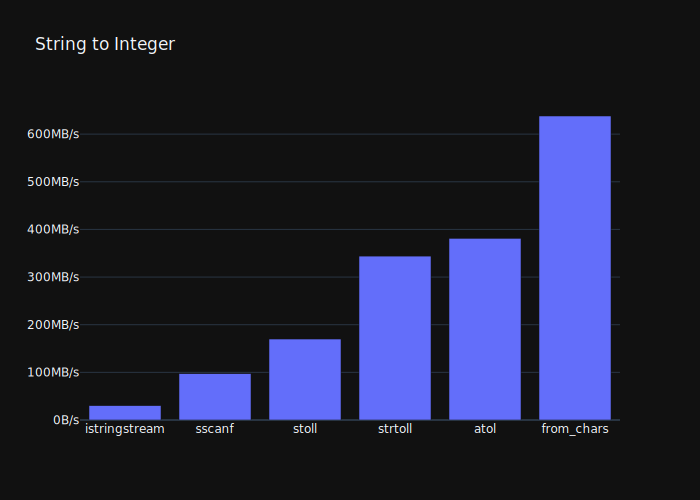

In [53]:
fig = px.bar(df[df.Group=="IntFieldParse"], x='Variant', y='bytes_per_second', title="String to Integer")
fig.update_layout(
    yaxis = dict(
        title=None,
        ticksuffix = 'B/s',
    ),
    xaxis = dict(title=None)
)
fig.show(figure_show_mode)
if save_images_used_in_readme:
    fig.write_image("string-to-integer.svg")

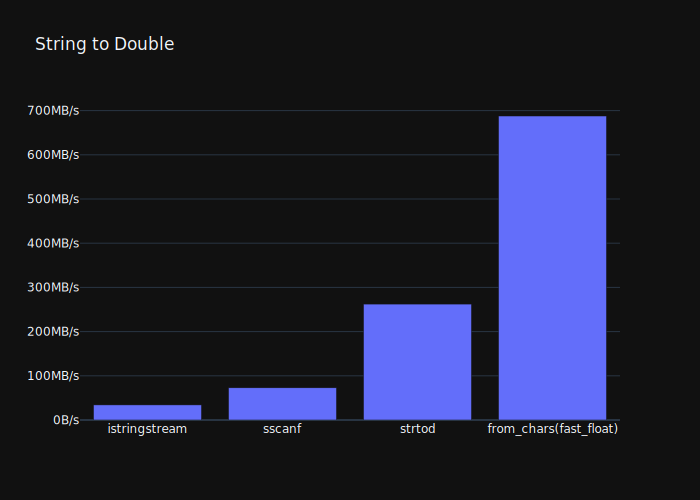

In [54]:
fig = px.bar(df[df.Group=="DoubleFieldParse"], x='Variant', y='bytes_per_second', title="String to Double")
fig.update_layout(
    yaxis = dict(
        title=None,
        ticksuffix = 'B/s',
    ),
    xaxis = dict(title=None)
)
fig.show(figure_show_mode)
if save_images_used_in_readme:
    fig.write_image("string-to-double.svg")

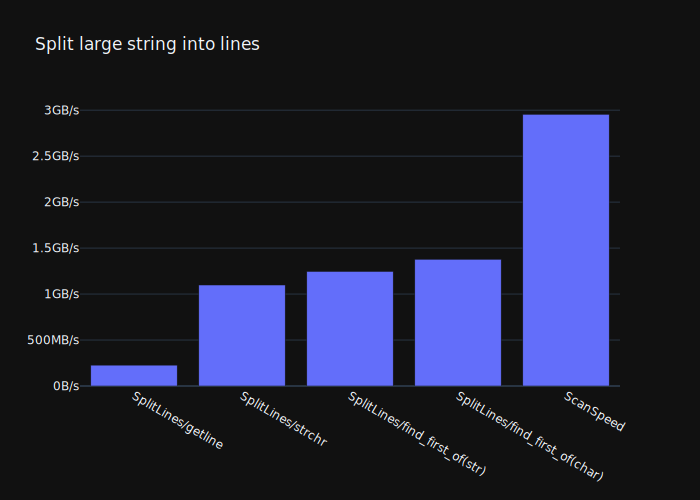

In [55]:
data = df[df["Group"].isin(["ScanSpeed", "SplitLines"])]

fig = px.bar(data, x='Benchmark', y='bytes_per_second', title="Split large string into lines")
fig.update_layout(
    yaxis = dict(
        title=None,
        ticksuffix = 'B/s',
        tickformat = '~s'
    ),
    xaxis = dict(title=None)
)
fig.show(figure_show_mode)


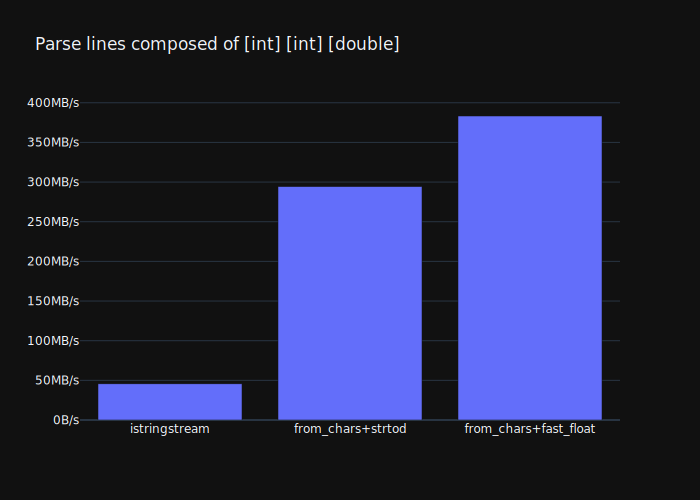

In [56]:
data = df[df["Group"].isin(["BlockParse"])]

fig = px.bar(data, x='Variant', y='bytes_per_second', title="Parse lines composed of [int] [int] [double]")
fig.update_layout(
    yaxis = dict(
        title=None,
        ticksuffix = 'B/s',
    ),
    xaxis = dict(title=None)
)
fig.show(figure_show_mode)

In [57]:
pardata = df[df["Group"].isin(["BlockParseParallel"])].copy()
pardata["ParVariant"] = pardata["Variant"].str.split("/").str[0]
pardata["ChunkSizeInt"] = pardata["Variant"].str.split("/").str[2].astype(int)
pardata["ChunkSize"] = pardata["ChunkSizeInt"].transform(format_bytes)

pardata.sort_values(by=['ParVariant', 'p', 'ChunkSizeInt'], ascending=[True, True, False], inplace=True)

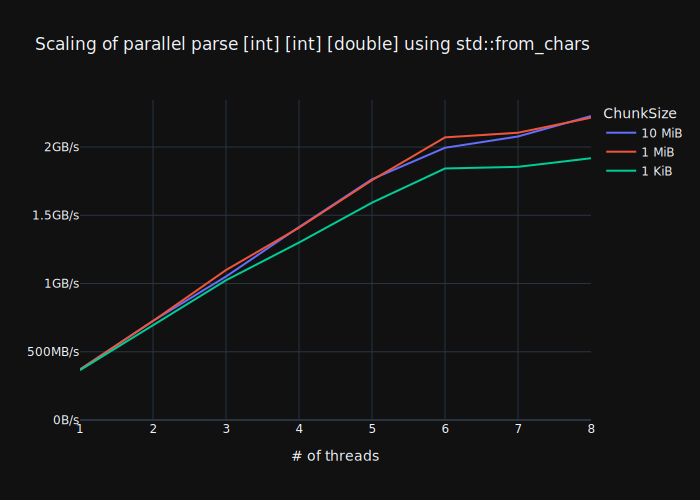

In [58]:
data = pardata[pardata["ParVariant"].isin(["from_chars(fast_float)"])]

fig = px.line(data, x='p', y='bytes_per_second', title="Scaling of parallel parse [int] [int] [double] using std::from_chars", color="ChunkSize")
fig.update_layout(
    yaxis = dict(
        title=None,
        ticksuffix = 'B/s',
        rangemode = 'tozero',
        tickformat = '~s'
    ),
    xaxis = dict(title='# of threads')
)
fig.show(figure_show_mode)

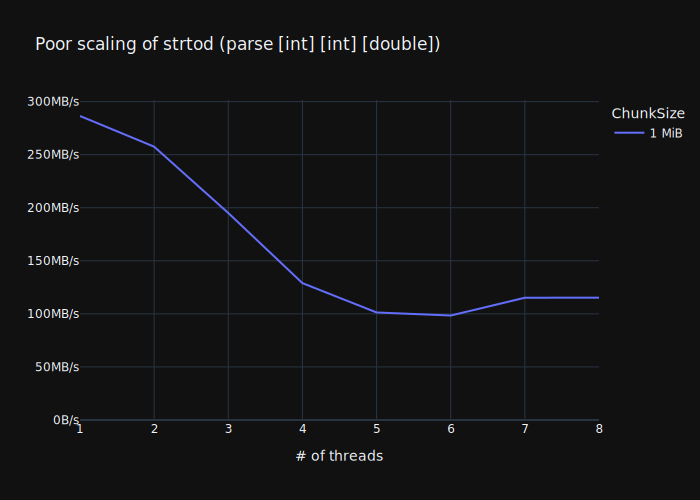

In [59]:
data = pardata[pardata["ParVariant"].isin(["from_chars+strtod"])]

fig = px.line(data, x='p', y='bytes_per_second', title="Poor scaling of strtod (parse [int] [int] [double])", color="ChunkSize")
fig.update_layout(
    yaxis = dict(
        title=None,
        ticksuffix = 'B/s',
        rangemode = 'tozero',
        tickformat = '~s'
    ),
    xaxis = dict(title='# of threads')
)
fig.show(figure_show_mode)

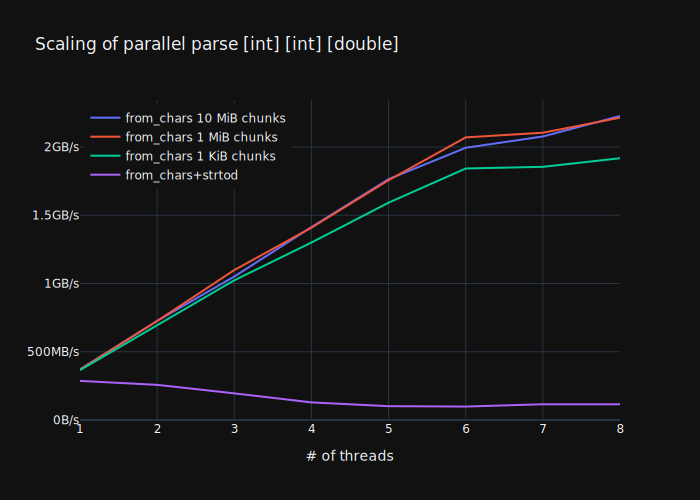

In [60]:
data = pardata[pardata["ParVariant"].isin(["from_chars(fast_float)", "from_chars+strtod"])]

def format_par_legend(row):
    variant = row.ParVariant
    variant = variant.replace("(fast_float)", "")
    chunks = f" {row.ChunkSize} chunks" if variant == "from_chars" else ""
    return f"{variant}{chunks}"

data["Legend"] = data.apply(format_par_legend, axis=1)

fig = px.line(data, x='p', y='bytes_per_second', title="Scaling of parallel parse [int] [int] [double]", color="Legend")
fig.update_layout(
    yaxis = dict(
        title=None,
        ticksuffix = 'B/s',
        rangemode = 'tozero',
        tickformat = '~s'
    ),
    xaxis = dict(title='# of threads'),
    legend=dict(
        title=None,
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
)
fig.show(figure_show_mode)
if save_images_used_in_readme:
    fig.write_image("parallel-parse-scaling.svg")